In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_img = os.listdir('/content/data/with_mask')
print(with_mask_img[0:5])

['with_mask_98.jpg', 'with_mask_3313.jpg', 'with_mask_2912.jpg', 'with_mask_409.jpg', 'with_mask_2494.jpg']


In [7]:
without_mask_img = os.listdir('/content/data/without_mask')
print(without_mask_img[0:5])

['without_mask_2704.jpg', 'without_mask_3521.jpg', 'without_mask_1615.jpg', 'without_mask_2762.jpg', 'without_mask_1229.jpg']


In [8]:
print(f"Number of Images with masks: {len(with_mask_img)}")
print(f"Number of Images without masks: {len(without_mask_img)}")

Number of Images with masks: 3725
Number of Images without masks: 3828


In [9]:
# labeling
# with mask -> 1
# without mask -> 0

In [10]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828

In [11]:
print(len(with_mask_label),len(without_mask_label))

3725 3828


In [12]:
labels = with_mask_label +  without_mask_label

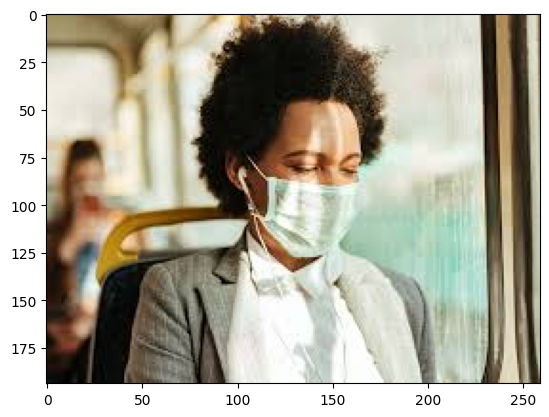

In [13]:
# displaying an image
img = mpimg.imread('/content/data/with_mask/with_mask_2912.jpg')
imgplot = plt.imshow(img)
plt.show()

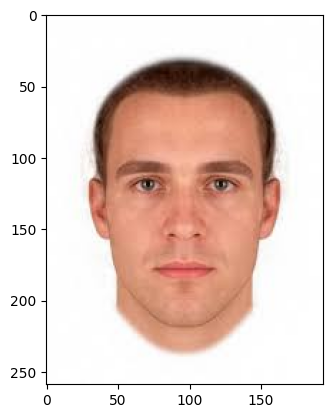

In [14]:
img = mpimg.imread('/content/data/without_mask/without_mask_3521.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_img:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[ 41,  45,  56],
        [ 46,  50,  60],
        [ 49,  53,  62],
        ...,
        [ 66,  68,  78],
        [112, 112, 121],
        [139, 141, 149]],

       [[ 42,  46,  58],
        [ 46,  50,  61],
        [ 49,  53,  62],
        ...,
        [160, 163, 172],
        [184, 186, 195],
        [171, 171, 181]],

       [[ 43,  47,  57],
        [ 44,  48,  57],
        [ 45,  49,  58],
        ...,
        [164, 167, 176],
        [109, 112, 121],
        [ 73,  74,  86]],

       ...,

       [[177, 143, 118],
        [172, 136, 109],
        [176, 137, 106],
        ...,
        [ 42,  32,  49],
        [ 37,  29,  45],
        [ 29,  22,  36]],

       [[174, 150, 128],
        [173, 146, 122],
        [167, 132, 104],
        ...,
        [ 41,  30,  49],
        [ 34,  25,  43],
        [ 26,  19,  33]],

       [[121, 105,  90],
        [157, 135, 117],
        [171, 138, 116],
        ...,
        [ 42,  31,  48],
        [ 38,  29,  45],
        [ 32,  25,  38]]], dtype=uint8)
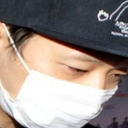

In [16]:
data[0]

In [17]:
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_img:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [18]:
len(data)

7553

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
X = np.array(data)
Y = np.array(labels)

In [22]:
print(X.shape,Y.shape)

(7553, 128, 128, 3) (7553,)


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [24]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)
(6042,) (1511,)


In [25]:
# Scalling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [27]:
x_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7372549 , 0.81176471, 0.89019608],
        [0.76862745, 0.83921569, 0.90588235],
        [0.77647059, 0.84705882, 0.91372549]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.36862745, 0.57647059, 0.82745098],
        [0.38039216, 0.59215686, 0.84313725],
        [0.37254902, 0.58431373, 0.83137255]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.41960784, 0.64313725, 0.87843137],
        [0.41568627, 0.64313725, 0.8745098 ],
        [0.41176471, 0.63921569, 0.87058824]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [28]:
# Model

In [31]:
import tensorflow as tf
from tensorflow import keras
number_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes,activation = 'sigmoid'))

In [32]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])


In [33]:
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 177s 1s/step - loss: 0.4685 - accuracy: 0.8102 - val_loss: 0.3162 - val_accuracy: 0.8529
Epoch 2/10
170/170 [==============================] - 153s 900ms/step - loss: 0.2987 - accuracy: 0.8790 - val_loss: 0.2438 - val_accuracy: 0.8810
Epoch 3/10
170/170 [==============================] - 155s 915ms/step - loss: 0.2443 - accuracy: 0.9040 - val_loss: 0.2377 - val_accuracy: 0.8876
Epoch 4/10
170/170 [==============================] - 152s 894ms/step - loss: 0.2054 - accuracy: 0.9185 - val_loss: 0.1930 - val_accuracy: 0.9124
Epoch 5/10
170/170 [==============================] - 155s 907ms/step - loss: 0.1896 - accuracy: 0.9218 - val_loss: 0.1774 - val_accuracy: 0.9256
Epoch 6/10
170/170 [==============================] - 164s 966ms/step - loss: 0.1490 - accuracy: 0.9422 - val_loss: 0.1780 - val_accuracy: 0.9207
Epoch 7/10
170/170 [==============================] - 151s 890ms/step - loss: 0.1269 - accuracy: 0.9529 - val_loss: 0.2221 - va

In [34]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print(loss,accuracy)

48/48 [==============================] - 15s 320ms/step - loss: 0.2464 - accuracy: 0.9219
0.24641764163970947 0.9219059944152832


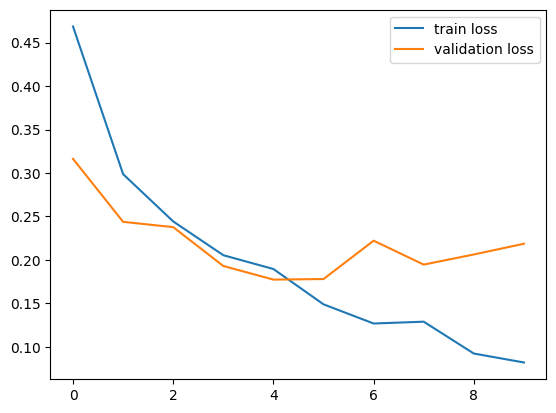

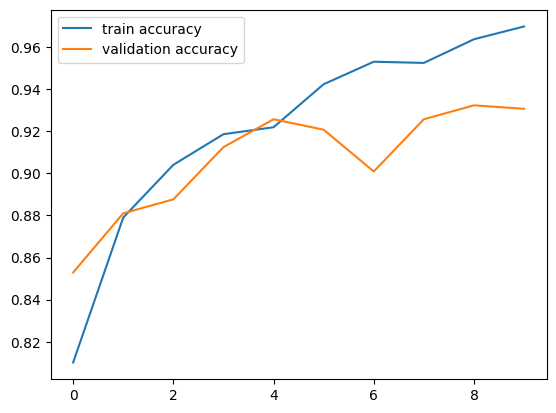

In [39]:
# plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/mask_img.png


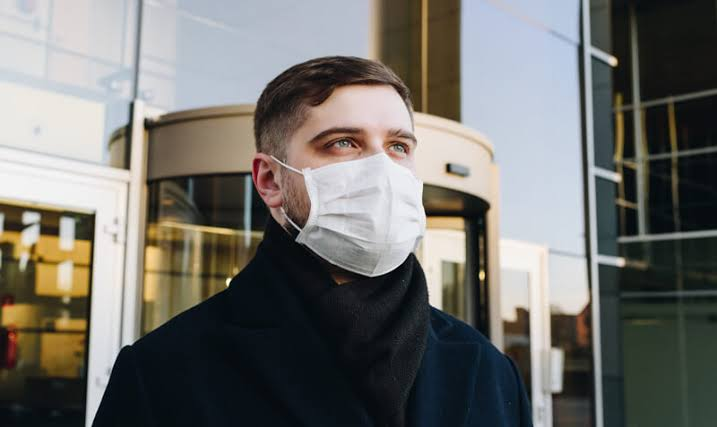

1/1 [==============================] - 0s 146ms/step
[[0.1459163 0.6457445]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/without_mask.png


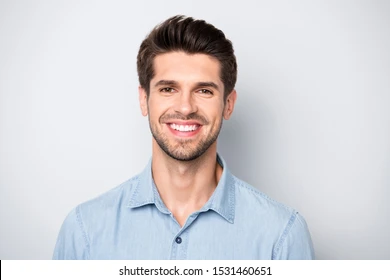

1/1 [==============================] - 0s 34ms/step
[[0.5765778  0.41729394]]
0
The person in the image is not wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')